In [17]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs

device = 'cpu'

## Plot loss over training iterations

In [18]:
experiment_dir = "../trained_models/02_gamma_v_ss/"
iterations = []
losses = []
exps = []

for gamma in os.listdir(experiment_dir):
    gamma_exp_dir = experiment_dir + f'{gamma}/'
    for gamma_iter in os.listdir(gamma_exp_dir):
        for file in os.listdir(gamma_exp_dir + gamma_iter):
            if 'tfevents' not in file: continue
            tfevents_file = gamma_exp_dir + gamma_iter + '/' + file
            event_acc = EventAccumulator(tfevents_file)
            event_acc.Reload()
            scalar_events = event_acc.Scalars('loss_train')
            for i in range(len(scalar_events)):
                iterations.append(scalar_events[i].step)
                losses.append(scalar_events[i].value)
                exps.append(gamma)
            break

iterations = np.array(iterations)
losses = np.array(losses)
exps = np.array(exps)

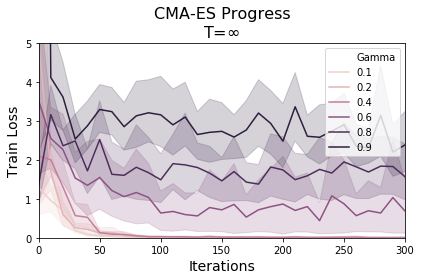

In [22]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'Iterations': iterations, 'Loss': losses, 'Gamma': exps})
sns.lineplot(x='Iterations', y='Loss', hue='Gamma', legend='full', data=df)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Train Loss', fontsize=14)
plt.title('CMA-ES Progress\nT=$\infty$', fontsize=16)
plt.legend()
plt.tight_layout()
plt.xlim(0, 300)
plt.ylim(0, 5)
plt.savefig('gamma_v_ss.png', dpi=200)
plt.show()